# Preprocesamiento

In [ ]:
!pip install --upgrade pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 36.7 MB/s eta 0:00:00


In [ ]:
import fitz

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Función para extraer texto de un PDF
def extraer_texto(pdf_file):
    texto = ""
    documento = fitz.open(stream=pdf_file.read(), filetype="pdf")
    for page_num in range(len(documento)):
        texto += documento[page_num].get_text()
    return texto

# Cargar el texto del PDF
with open("/content/goog-10-q-q1-2024.pdf", "rb") as pdf_file:
    texto_documento = extraer_texto(pdf_file)


In [ ]:
pdf_file.name

'/content/goog-10-q-q1-2024.pdf'

In [ ]:
# Dividir el texto en párrafos
parrafos = re.split(r"\n{2,}", texto_documento)
parrafos

['UNITED STATES\nSECURITIES AND EXCHANGE COMMISSION\nWashington, D.C. 20549\n________________________________________________________________________________________\nFORM 10-Q \n________________________________________________________________________________________\n(Mark One)\n☒\nQUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\nFor the quarterly period ended March 31, 2024\nOR\n☐\nTRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\nFor the transition period from _______ to _______\nCommission file number: 001-37580 \n________________________________________________________________________________________\nAlphabet Inc. \n(Exact name of registrant as specified in its charter)\n________________________________________________________________________________________\nDelaware\n61-1767919\n(State or other jurisdiction of incorporation or organization)\n(I.R.S. Employer Identification Number)\n1600 Amphitheatre

In [ ]:
# Convertir los párrafos en un solo texto para facilitar la búsqueda
texto_unificado = " ".join(parrafos)
texto_unificado

'UNITED STATES\nSECURITIES AND EXCHANGE COMMISSION\nWashington, D.C. 20549\n________________________________________________________________________________________\nFORM 10-Q \n________________________________________________________________________________________\n(Mark One)\n☒\nQUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\nFor the quarterly period ended March 31, 2024\nOR\n☐\nTRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\nFor the transition period from _______ to _______\nCommission file number: 001-37580 \n________________________________________________________________________________________\nAlphabet Inc. \n(Exact name of registrant as specified in its charter)\n________________________________________________________________________________________\nDelaware\n61-1767919\n(State or other jurisdiction of incorporation or organization)\n(I.R.S. Employer Identification Number)\n1600 Amphitheatre 

In [ ]:
# Buscar la sección del documento que contiene las partes financieras
inicio_finanzas = re.search(r"(?i)PART II[^\n]+", texto_unificado).start()
inicio_finanzas

4225

In [ ]:
# Obtener solo la sección de las partes financieras
partes_financieras = texto_unificado[inicio_finanzas:]
partes_financieras

'PART II. OTHER INFORMATION\nItem 1\nLegal Proceedings\n43\nItem 1A Risk Factors\n43\nItem 2\nUnregistered Sales of Equity Securities and Use of Proceeds\n44\nItem 5\nOther Information\n44\nItem 6\nExhibits\n45\nSignatures\n46\nTable of Contents\nAlphabet Inc.\n2\nNote About Forward-Looking Statements\nThis Quarterly Report on Form 10-Q contains forward-looking statements within the meaning of the Private \nSecurities Litigation Reform Act of 1995. These include, among other things, statements regarding:\n•\nthe growth of our business and revenues and our expectations about the factors that influence our success \nand trends in our business;\n•\nfluctuations in our revenues and margins and various factors contributing to such fluctuations;\n•\nour expectation that the continuing shift from an offline to online world will continue to benefit our business;\n•\nour expectation that the portion of our revenues that we derive beyond advertising will continue to increase \nand may affect our

In [ ]:
# Función para convertir las partes financieras en un DataFrame
def partes_financieras_a_dataframe(partes_financieras):
    """
    Convierte las partes financieras en un DataFrame de pandas.

    Args:
    partes_financieras (str): Texto de las partes financieras.

    Returns:
    pandas.DataFrame: DataFrame con las partes financieras.
    """
    # Crear una lista para almacenar los datos
    data = []

    # Dividir las partes financieras en secciones individuales
    secciones = re.split(r"(?i)PART [IVX]+", partes_financieras)[1:]

    # Agregar las secciones al DataFrame
    for i, seccion in enumerate(secciones, start=1):
        data.append({"Parte": f"Parte {i}", "Texto": seccion})

    # Crear el DataFrame
    df = pd.DataFrame(data)

    return df

In [ ]:
# Convertir las partes financieras en un DataFrame
df_partes_financieras = partes_financieras_a_dataframe(partes_financieras)

# Mostrar el DataFrame
print("DataFrame de las partes financieras:")
print(df_partes_financieras)

DataFrame de las partes financieras:
       Parte                                              Texto
0    Parte 1  . OTHER INFORMATION\nItem 1\nLegal Proceedings...
1    Parte 2  , Item 2, \n"Management's Discussion and Analy...
2    Parte 3  , Item 1A, “Risk Factors” in our Annual Report...
3    Parte 4  , Item 1A, "Risk Factors" in our Annual Report...
4    Parte 5  , Item 7, "Management's Discussion and Analysi...
5    Parte 6  . \nFINANCIAL INFORMATION\nITEM 1.\nFINANCIAL ...
6    Parte 7  , Item 1A "Risk Factors," as updated in this Q...
7    Parte 8  , Item 8 in our Annual Report on Form 10-K for...
8    Parte 9  , Item 7 of our Annual Report on Form 10-K for...
9   Parte 10  , \nItem 8 and Item 7A, “Quantitative and Qual...
10  Parte 11  , \nItem 8 in our Annual Report on Form 10-K f...
11  Parte 12  , Item 7, "Critical Accounting Estimates" in o...
12  Parte 13  , Item 7A, Quantitative and \nQualitative Disc...
13  Parte 14  .  \nOTHER INFORMATION\nITEM 1.\nLEGAL PROCEED...
14 

In [ ]:
# 1. Palabras más comunes
from collections import Counter

# Convertir todas las palabras en minúsculas y dividirlas
all_words = ' '.join(df_partes_financieras['Texto']).lower().split()

# Contar la frecuencia de cada palabra y tomar las más comunes
common_words = Counter(all_words).most_common(10)
print("Palabras más comunes:")
print(common_words)

Palabras más comunes:
[('and', 786), ('of', 723), ('the', 683), ('in', 438), ('to', 391), ('$', 373), ('our', 289), ('as', 247), ('31,', 206), ('for', 191)]


In [ ]:
# Obtener las columnas disponibles en el DataFrame
columnas_disponibles = df_partes_financieras.columns
print("Columnas disponibles en el DataFrame:")
print(columnas_disponibles)

Columnas disponibles en el DataFrame:
Index(['Parte', 'Texto'], dtype='object')


In [ ]:
# Calcular la longitud de cada parte del texto
df_partes_financieras['Longitud'] = df_partes_financieras['Texto'].apply(len)

# Mostrar las primeras filas del DataFrame con la longitud calculada
print("DataFrame con la longitud de cada parte del texto:")
print(df_partes_financieras[['Parte', 'Longitud']].head())

DataFrame con la longitud de cada parte del texto:
     Parte  Longitud
0  Parte 1      4561
1  Parte 2       142
2  Parte 3       832
3  Parte 4       181
4  Parte 5      1006


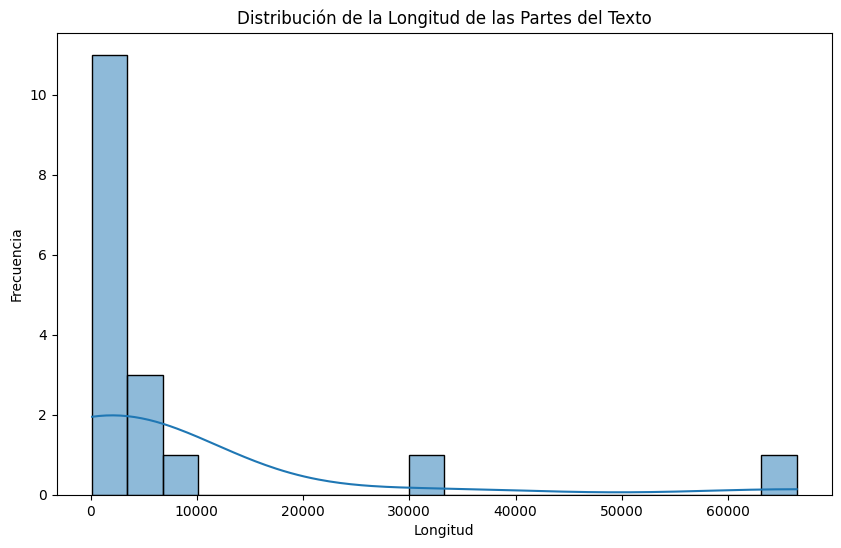

In [ ]:
# Visualizar la distribución de la longitud de las partes del texto
plt.figure(figsize=(10, 6))
sns.histplot(data=df_partes_financieras, x='Longitud', bins=20, kde=True)
plt.title('Distribución de la Longitud de las Partes del Texto')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Dividir el texto en secciones separadas por doble salto de línea
df_partes_financieras

,Parte,Texto,Longitud
0,Parte 1,. OTHER INFORMATION\nItem 1\nLegal Proceedings...,4561
1,Parte 2,", Item 2, \n""Management's Discussion and Analy...",142
2,Parte 3,", Item 1A, “Risk Factors” in our Annual Report...",832
3,Parte 4,", Item 1A, ""Risk Factors"" in our Annual Report...",181
4,Parte 5,", Item 7, ""Management's Discussion and Analysi...",1006
5,Parte 6,. \nFINANCIAL INFORMATION\nITEM 1.\nFINANCIAL ...,66466
6,Parte 7,", Item 1A ""Risk Factors,"" as updated in this Q...",1032
7,Parte 8,", Item 8 in our Annual Report on Form 10-K for...",231
8,Parte 9,", Item 7 of our Annual Report on Form 10-K for...",9374
9,Parte 10,", \nItem 8 and Item 7A, “Quantitative and Qual...",756


In [ ]:
def extract_tables_from_data(data):
    # Inicializar listas para almacenar los encabezados y filas de la tabla
    headers = []
    rows = []

    # Inicializar flag para detectar si estamos dentro de una tabla
    in_table = False

    # Inicializar variable para almacenar las filas de la tabla actual
    current_table_rows = []

    # Iterar sobre cada fila del DataFrame
    for index, row in data.iterrows():
        # Extraer el texto de la columna "Texto"
        text = row['Texto']

        # Buscar patrones que indiquen el inicio de una tabla
        if re.search(r'CONSOLIDATED (BALANCE SHEETS|STATEMENTS OF INCOME|STATEMENTS OF CASH FLOWS|STATEMENTS OF STOCKHOLDERS’ EQUITY)', text):
            in_table = True
            headers = []
            current_table_rows = []
        # Buscar patrones que indiquen el final de una tabla
        elif in_table and re.search(r'See accompanying notes', text):
            in_table = False
            if current_table_rows:
                # Si ya tenemos los encabezados, agregamos las filas al resultado
                if headers:
                    rows.extend(current_table_rows)
                else:
                    # Los encabezados son los nombres de las columnas
                    headers.extend(current_table_rows.pop(0))
                    rows.extend(current_table_rows)
        # Si estamos dentro de una tabla, procesar la fila actual
        elif in_table:
            # Dividir la fila en columnas usando coma o espacios como delimitadores
            columns = re.split(r',|\s{2,}', text.strip())
            # Eliminar elementos vacíos de la lista de columnas
            columns = [c for c in columns if c]
            # Agregar la fila actual a las filas de la tabla actual
            current_table_rows.append(columns)

    # Crear un DataFrame de Pandas con los encabezados y filas extraídos
    df_tables = pd.DataFrame(rows, columns=headers)
    return df_tables

In [ ]:
# Extraer las tablas de los datos en df_partes_financieras
df_tables = extract_tables_from_data(df_partes_financieras)
print(df_tables)

Empty DataFrame
Columns: []
Index: []


In [ ]:
!pip install camelot-py[cv]

INFO: pip is looking at multiple versions of camelot-py[cv] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: camelot-py
    Found existing installation: camelot-py 0.11.0
    Uninstalling camelot-py-0.11.0:
      Successfully uninstalled camelot-py-0.11.0


In [ ]:
!pip install ghostscript
!pip install camelot-py[cv]
!pip install excalibur-py
!apt install ghostscript python3-tk

  Using cached ghostscript-0.7-py2.py3-none-any.whl (25 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.0/426.0 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 kB 18.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 1

In [ ]:
!pip install pyPDF2==2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: pyPDF2
    Found existing installation: PyPDF2 2.12.1
    Uninstalling PyPDF2-2.12.1:
      Successfully uninstalled PyPDF2-2.12.1


In [ ]:
import camelot

# Extrae todas las tablas del PDF usando Camelot
tables = camelot.read_pdf('/content/goog-10-q-q1-2024.pdf', pages='all')

# Muestra todas las tablas como DataFrames de Pandas
if tables:
    for idx, table in enumerate(tables, start=1):
        print(f"Tabla {idx}:")
        print(table.df)
        print("\n")
else:
    print("No se encontraron tablas en el PDF.")

No se encontraron tablas en el PDF.
